# 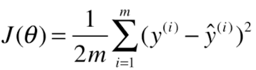

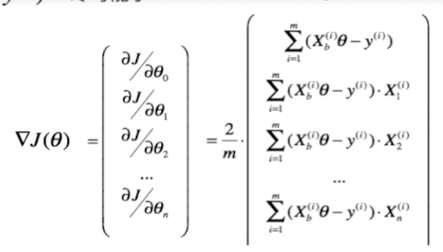

In [33]:
### Gradient descent in multiple linear regression

import numpy as np
import matplotlib.pyplot as plt



np.random.seed(666)
x = 2 * np.random.random(size=3)
y = x * 3. + 4. + np.random.normal(size=3)
X = x.reshape(-1, 1)
X

array([[1.40087424],
       [1.68837329],
       [1.35302867]])

In [34]:
y

array([8.167261  , 8.86570777, 6.6295138 ])

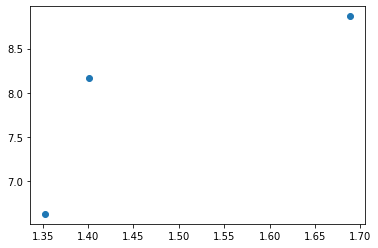

In [35]:
plt.scatter(x,y)
plt.show()

In [36]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')


In [37]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    
    res[0] = np.sum(X_b.dot(theta) - y)
    
    
    
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
        #print(X_b[:,i])
    
    
    return res * 2 / len(X_b)

In [38]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        #print(gradient)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

In [39]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1,1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

[-15.77498839 -23.586568  ]
[-14.76096829 -22.0747022 ]
[-13.81200276 -20.65982972]
[-12.92391824 -19.33572799]
[-12.09280891 -18.09657362]
[-11.31501955 -16.93691682]
[-10.58712941 -15.85165744]
[ -9.90593721 -14.83602253]
[ -9.26844707 -13.88554533]
[ -8.67185528 -12.99604567]
[ -8.11353801 -12.16361154]
[ -7.59103977 -11.38458191]
[ -7.10206259 -10.65553063]
[-6.64445594 -9.97325133]
[-6.21620724 -9.33474338]
[-5.81543304 -8.73719862]
[-5.44037072 -8.17798907]
[-5.08937073 -7.65465535]
[-4.76088936 -7.16489583]
[-4.45348193 -6.70655658]
[-4.16579644 -6.27762183]
[-3.89656765 -5.87620515]
[-3.64461145 -5.5005411 ]
[-3.40881974 -5.14897755]
[-3.18815548 -4.81996832]
[-2.98164816 -4.51206644]
[-2.78838956 -4.22391778]
[-2.60752971 -3.95425507]
[-2.43827316 -3.70189235]
[-2.27987551 -3.46571974]
[-2.1316401  -3.24469856]
[-1.99291499 -3.03785679]
[-1.86309003 -2.84428473]
[-1.74159424 -2.66313108]
[-1.62789326 -2.49359914]
[-1.52148702 -2.3349433 ]
[-1.42190753 -2.18646583]
[-1.32871681

[ 0.0273553  -0.01834752]
[ 0.02735156 -0.01834501]
[ 0.02734782 -0.01834251]
[ 0.02734408 -0.01834   ]
[ 0.02734034 -0.01833749]
[ 0.0273366  -0.01833498]
[ 0.02733286 -0.01833247]
[ 0.02732913 -0.01832997]
[ 0.02732539 -0.01832746]
[ 0.02732165 -0.01832495]
[ 0.02731792 -0.01832245]
[ 0.02731418 -0.01831994]
[ 0.02731044 -0.01831744]
[ 0.02730671 -0.01831493]
[ 0.02730298 -0.01831243]
[ 0.02729924 -0.01830992]
[ 0.02729551 -0.01830742]
[ 0.02729178 -0.01830492]
[ 0.02728804 -0.01830241]
[ 0.02728431 -0.01829991]
[ 0.02728058 -0.01829741]
[ 0.02727685 -0.0182949 ]
[ 0.02727312 -0.0182924 ]
[ 0.02726939 -0.0182899 ]
[ 0.02726566 -0.0182874 ]
[ 0.02726193 -0.0182849 ]
[ 0.0272582 -0.0182824]
[ 0.02725448 -0.0182799 ]
[ 0.02725075 -0.0182774 ]
[ 0.02724702 -0.0182749 ]
[ 0.0272433 -0.0182724]
[ 0.02723957 -0.0182699 ]
[ 0.02723585 -0.0182674 ]
[ 0.02723212 -0.0182649 ]
[ 0.0272284  -0.01826241]
[ 0.02722467 -0.01825991]
[ 0.02722095 -0.01825741]
[ 0.02721723 -0.01825492]
[ 0.02721351 -0.

[ 0.02528653 -0.01695998]
[ 0.02528307 -0.01695766]
[ 0.02527962 -0.01695534]
[ 0.02527616 -0.01695302]
[ 0.0252727 -0.0169507]
[ 0.02526925 -0.01694838]
[ 0.02526579 -0.01694606]
[ 0.02526234 -0.01694375]
[ 0.02525888 -0.01694143]
[ 0.02525543 -0.01693911]
[ 0.02525197 -0.0169368 ]
[ 0.02524852 -0.01693448]
[ 0.02524507 -0.01693216]
[ 0.02524162 -0.01692985]
[ 0.02523816 -0.01692753]
[ 0.02523471 -0.01692522]
[ 0.02523126 -0.0169229 ]
[ 0.02522781 -0.01692059]
[ 0.02522436 -0.01691828]
[ 0.02522091 -0.01691596]
[ 0.02521746 -0.01691365]
[ 0.02521401 -0.01691134]
[ 0.02521057 -0.01690902]
[ 0.02520712 -0.01690671]
[ 0.02520367 -0.0169044 ]
[ 0.02520022 -0.01690209]
[ 0.02519678 -0.01689978]
[ 0.02519333 -0.01689746]
[ 0.02518989 -0.01689515]
[ 0.02518644 -0.01689284]
[ 0.025183   -0.01689053]
[ 0.02517955 -0.01688822]
[ 0.02517611 -0.01688591]
[ 0.02517267 -0.01688361]
[ 0.02516923 -0.0168813 ]
[ 0.02516578 -0.01687899]
[ 0.02516234 -0.01687668]
[ 0.0251589  -0.01687437]
[ 0.02515546 -

[ 0.02362166 -0.01584333]
[ 0.02361843 -0.01584116]
[ 0.0236152 -0.015839 ]
[ 0.02361197 -0.01583683]
[ 0.02360875 -0.01583466]
[ 0.02360552 -0.0158325 ]
[ 0.02360229 -0.01583033]
[ 0.02359906 -0.01582817]
[ 0.02359583 -0.015826  ]
[ 0.02359261 -0.01582384]
[ 0.02358938 -0.01582168]
[ 0.02358615 -0.01581951]
[ 0.02358293 -0.01581735]
[ 0.0235797  -0.01581519]
[ 0.02357648 -0.01581302]
[ 0.02357326 -0.01581086]
[ 0.02357003 -0.0158087 ]
[ 0.02356681 -0.01580654]
[ 0.02356359 -0.01580437]
[ 0.02356036 -0.01580221]
[ 0.02355714 -0.01580005]
[ 0.02355392 -0.01579789]
[ 0.0235507  -0.01579573]
[ 0.02354748 -0.01579357]
[ 0.02354426 -0.01579141]
[ 0.02354104 -0.01578925]
[ 0.02353782 -0.01578709]
[ 0.0235346  -0.01578493]
[ 0.02353138 -0.01578277]
[ 0.02352816 -0.01578062]
[ 0.02352495 -0.01577846]
[ 0.02352173 -0.0157763 ]
[ 0.02351851 -0.01577414]
[ 0.0235153  -0.01577199]
[ 0.02351208 -0.01576983]
[ 0.02350886 -0.01576767]
[ 0.02350565 -0.01576552]
[ 0.02350244 -0.01576336]
[ 0.02349922 -

[ 0.02136849 -0.0143321 ]
[ 0.02136557 -0.01433014]
[ 0.02136265 -0.01432818]
[ 0.02135972 -0.01432622]
[ 0.0213568  -0.01432426]
[ 0.02135388 -0.0143223 ]
[ 0.02135096 -0.01432034]
[ 0.02134804 -0.01431838]
[ 0.02134512 -0.01431643]
[ 0.0213422  -0.01431447]
[ 0.02133929 -0.01431251]
[ 0.02133637 -0.01431055]
[ 0.02133345 -0.0143086 ]
[ 0.02133053 -0.01430664]
[ 0.02132761 -0.01430468]
[ 0.0213247  -0.01430273]
[ 0.02132178 -0.01430077]
[ 0.02131887 -0.01429881]
[ 0.02131595 -0.01429686]
[ 0.02131304 -0.0142949 ]
[ 0.02131012 -0.01429295]
[ 0.02130721 -0.01429099]
[ 0.02130429 -0.01428904]
[ 0.02130138 -0.01428709]
[ 0.02129847 -0.01428513]
[ 0.02129555 -0.01428318]
[ 0.02129264 -0.01428123]
[ 0.02128973 -0.01427927]
[ 0.02128682 -0.01427732]
[ 0.02128391 -0.01427537]
[ 0.021281   -0.01427342]
[ 0.02127809 -0.01427146]
[ 0.02127518 -0.01426951]
[ 0.02127227 -0.01426756]
[ 0.02126936 -0.01426561]
[ 0.02126645 -0.01426366]
[ 0.02126354 -0.01426171]
[ 0.02126063 -0.01425976]
[ 0.02125773

[ 0.01956696 -0.01312379]
[ 0.01956428 -0.013122  ]
[ 0.01956161 -0.0131202 ]
[ 0.01955893 -0.01311841]
[ 0.01955626 -0.01311661]
[ 0.01955358 -0.01311482]
[ 0.01955091 -0.01311303]
[ 0.01954824 -0.01311123]
[ 0.01954556 -0.01310944]
[ 0.01954289 -0.01310765]
[ 0.01954022 -0.01310585]
[ 0.01953754 -0.01310406]
[ 0.01953487 -0.01310227]
[ 0.0195322  -0.01310048]
[ 0.01952953 -0.01309869]
[ 0.01952686 -0.01309689]
[ 0.01952419 -0.0130951 ]
[ 0.01952152 -0.01309331]
[ 0.01951885 -0.01309152]
[ 0.01951618 -0.01308973]
[ 0.01951351 -0.01308794]
[ 0.01951084 -0.01308615]
[ 0.01950817 -0.01308436]
[ 0.01950551 -0.01308257]
[ 0.01950284 -0.01308078]
[ 0.01950017 -0.013079  ]
[ 0.01949751 -0.01307721]
[ 0.01949484 -0.01307542]
[ 0.01949217 -0.01307363]
[ 0.01948951 -0.01307184]
[ 0.01948684 -0.01307005]
[ 0.01948418 -0.01306827]
[ 0.01948151 -0.01306648]
[ 0.01947885 -0.01306469]
[ 0.01947618 -0.01306291]
[ 0.01947352 -0.01306112]
[ 0.01947086 -0.01305933]
[ 0.0194682  -0.01305755]
[ 0.01946553

[ 0.01785127 -0.01197306]
[ 0.01784883 -0.01197142]
[ 0.01784639 -0.01196978]
[ 0.01784395 -0.01196815]
[ 0.01784151 -0.01196651]
[ 0.01783907 -0.01196487]
[ 0.01783663 -0.01196324]
[ 0.01783419 -0.0119616 ]
[ 0.01783175 -0.01195997]
[ 0.01782931 -0.01195833]
[ 0.01782687 -0.0119567 ]
[ 0.01782444 -0.01195506]
[ 0.017822   -0.01195343]
[ 0.01781956 -0.01195179]
[ 0.01781713 -0.01195016]
[ 0.01781469 -0.01194852]
[ 0.01781225 -0.01194689]
[ 0.01780982 -0.01194525]
[ 0.01780738 -0.01194362]
[ 0.01780495 -0.01194199]
[ 0.01780251 -0.01194035]
[ 0.01780008 -0.01193872]
[ 0.01779764 -0.01193709]
[ 0.01779521 -0.01193546]
[ 0.01779277 -0.01193382]
[ 0.01779034 -0.01193219]
[ 0.01778791 -0.01193056]
[ 0.01778548 -0.01192893]
[ 0.01778304 -0.0119273 ]
[ 0.01778061 -0.01192567]
[ 0.01777818 -0.01192404]
[ 0.01777575 -0.0119224 ]
[ 0.01777332 -0.01192077]
[ 0.01777089 -0.01191914]
[ 0.01776846 -0.01191751]
[ 0.01776603 -0.01191588]
[ 0.0177636  -0.01191425]
[ 0.01776117 -0.01191263]
[ 0.01775874

[ 0.01644943 -0.01103283]
[ 0.01644718 -0.01103132]
[ 0.01644493 -0.01102981]
[ 0.01644268 -0.0110283 ]
[ 0.01644043 -0.01102679]
[ 0.01643819 -0.01102528]
[ 0.01643594 -0.01102378]
[ 0.01643369 -0.01102227]
[ 0.01643144 -0.01102076]
[ 0.0164292  -0.01101925]
[ 0.01642695 -0.01101775]
[ 0.0164247  -0.01101624]
[ 0.01642246 -0.01101473]
[ 0.01642021 -0.01101323]
[ 0.01641796 -0.01101172]
[ 0.01641572 -0.01101022]
[ 0.01641347 -0.01100871]
[ 0.01641123 -0.01100721]
[ 0.01640899 -0.0110057 ]
[ 0.01640674 -0.0110042 ]
[ 0.0164045  -0.01100269]
[ 0.01640225 -0.01100119]
[ 0.01640001 -0.01099968]
[ 0.01639777 -0.01099818]
[ 0.01639553 -0.01099667]
[ 0.01639328 -0.01099517]
[ 0.01639104 -0.01099367]
[ 0.0163888  -0.01099216]
[ 0.01638656 -0.01099066]
[ 0.01638432 -0.01098916]
[ 0.01638208 -0.01098765]
[ 0.01637984 -0.01098615]
[ 0.0163776  -0.01098465]
[ 0.01637536 -0.01098315]
[ 0.01637312 -0.01098164]
[ 0.01637088 -0.01098014]
[ 0.01636864 -0.01097864]
[ 0.0163664  -0.01097714]
[ 0.01636416

[ 0.01505026 -0.01009439]
[ 0.0150482  -0.01009301]
[ 0.01504614 -0.01009163]
[ 0.01504409 -0.01009025]
[ 0.01504203 -0.01008887]
[ 0.01503997 -0.01008749]
[ 0.01503791 -0.01008611]
[ 0.01503586 -0.01008473]
[ 0.0150338  -0.01008335]
[ 0.01503175 -0.01008197]
[ 0.01502969 -0.01008059]
[ 0.01502763 -0.01007921]
[ 0.01502558 -0.01007783]
[ 0.01502352 -0.01007646]
[ 0.01502147 -0.01007508]
[ 0.01501942 -0.0100737 ]
[ 0.01501736 -0.01007232]
[ 0.01501531 -0.01007094]
[ 0.01501326 -0.01006957]
[ 0.0150112  -0.01006819]
[ 0.01500915 -0.01006681]
[ 0.0150071  -0.01006544]
[ 0.01500504 -0.01006406]
[ 0.01500299 -0.01006268]
[ 0.01500094 -0.01006131]
[ 0.01499889 -0.01005993]
[ 0.01499684 -0.01005856]
[ 0.01499479 -0.01005718]
[ 0.01499274 -0.01005581]
[ 0.01499069 -0.01005443]
[ 0.01498864 -0.01005306]
[ 0.01498659 -0.01005168]
[ 0.01498454 -0.01005031]
[ 0.01498249 -0.01004893]
[ 0.01498044 -0.01004756]
[ 0.01497839 -0.01004618]
[ 0.01497634 -0.01004481]
[ 0.01497429 -0.01004344]
[ 0.01497225

[ 0.01376633 -0.00923324]
[ 0.01376445 -0.00923198]
[ 0.01376257 -0.00923072]
[ 0.01376069 -0.00922946]
[ 0.01375881 -0.00922819]
[ 0.01375692 -0.00922693]
[ 0.01375504 -0.00922567]
[ 0.01375316 -0.00922441]
[ 0.01375128 -0.00922315]
[ 0.0137494  -0.00922189]
[ 0.01374752 -0.00922062]
[ 0.01374564 -0.00921936]
[ 0.01374376 -0.0092181 ]
[ 0.01374188 -0.00921684]
[ 0.01374    -0.00921558]
[ 0.01373812 -0.00921432]
[ 0.01373624 -0.00921306]
[ 0.01373437 -0.0092118 ]
[ 0.01373249 -0.00921054]
[ 0.01373061 -0.00920928]
[ 0.01372873 -0.00920802]
[ 0.01372685 -0.00920676]
[ 0.01372498 -0.0092055 ]
[ 0.0137231  -0.00920425]
[ 0.01372122 -0.00920299]
[ 0.01371935 -0.00920173]
[ 0.01371747 -0.00920047]
[ 0.0137156  -0.00919921]
[ 0.01371372 -0.00919795]
[ 0.01371184 -0.0091967 ]
[ 0.01370997 -0.00919544]
[ 0.01370809 -0.00919418]
[ 0.01370622 -0.00919292]
[ 0.01370435 -0.00919167]
[ 0.01370247 -0.00919041]
[ 0.0137006  -0.00918915]
[ 0.01369872 -0.0091879 ]
[ 0.01369685 -0.00918664]
[ 0.01369498

[ 0.01288989 -0.0086454 ]
[ 0.01288813 -0.00864422]
[ 0.01288637 -0.00864304]
[ 0.0128846  -0.00864186]
[ 0.01288284 -0.00864067]
[ 0.01288108 -0.00863949]
[ 0.01287932 -0.00863831]
[ 0.01287756 -0.00863713]
[ 0.0128758  -0.00863595]
[ 0.01287404 -0.00863477]
[ 0.01287227 -0.00863359]
[ 0.01287051 -0.00863241]
[ 0.01286875 -0.00863123]
[ 0.01286699 -0.00863004]
[ 0.01286523 -0.00862886]
[ 0.01286348 -0.00862768]
[ 0.01286172 -0.0086265 ]
[ 0.01285996 -0.00862533]
[ 0.0128582  -0.00862415]
[ 0.01285644 -0.00862297]
[ 0.01285468 -0.00862179]
[ 0.01285292 -0.00862061]
[ 0.01285117 -0.00861943]
[ 0.01284941 -0.00861825]
[ 0.01284765 -0.00861707]
[ 0.01284589 -0.00861589]
[ 0.01284414 -0.00861471]
[ 0.01284238 -0.00861354]
[ 0.01284063 -0.00861236]
[ 0.01283887 -0.00861118]
[ 0.01283711 -0.00861   ]
[ 0.01283536 -0.00860883]
[ 0.0128336  -0.00860765]
[ 0.01283185 -0.00860647]
[ 0.01283009 -0.00860529]
[ 0.01282834 -0.00860412]
[ 0.01282658 -0.00860294]
[ 0.01282483 -0.00860176]
[ 0.01282308

[ 0.01146901 -0.0076924 ]
[ 0.01146744 -0.00769135]
[ 0.01146587 -0.00769029]
[ 0.0114643  -0.00768924]
[ 0.01146273 -0.00768819]
[ 0.01146117 -0.00768714]
[ 0.0114596  -0.00768609]
[ 0.01145803 -0.00768504]
[ 0.01145646 -0.00768399]
[ 0.0114549  -0.00768293]
[ 0.01145333 -0.00768188]
[ 0.01145176 -0.00768083]
[ 0.0114502  -0.00767978]
[ 0.01144863 -0.00767873]
[ 0.01144707 -0.00767768]
[ 0.0114455  -0.00767663]
[ 0.01144394 -0.00767558]
[ 0.01144237 -0.00767453]
[ 0.01144081 -0.00767348]
[ 0.01143924 -0.00767243]
[ 0.01143768 -0.00767139]
[ 0.01143611 -0.00767034]
[ 0.01143455 -0.00766929]
[ 0.01143299 -0.00766824]
[ 0.01143142 -0.00766719]
[ 0.01142986 -0.00766614]
[ 0.0114283  -0.00766509]
[ 0.01142673 -0.00766404]
[ 0.01142517 -0.007663  ]
[ 0.01142361 -0.00766195]
[ 0.01142205 -0.0076609 ]
[ 0.01142048 -0.00765985]
[ 0.01141892 -0.00765881]
[ 0.01141736 -0.00765776]
[ 0.0114158  -0.00765671]
[ 0.01141424 -0.00765566]
[ 0.01141268 -0.00765462]
[ 0.01141112 -0.00765357]
[ 0.01140956

[ 0.0106031  -0.00711163]
[ 0.01060165 -0.00711065]
[ 0.0106002  -0.00710968]
[ 0.01059875 -0.00710871]
[ 0.0105973  -0.00710774]
[ 0.01059585 -0.00710676]
[ 0.0105944  -0.00710579]
[ 0.01059296 -0.00710482]
[ 0.01059151 -0.00710385]
[ 0.01059006 -0.00710288]
[ 0.01058861 -0.00710191]
[ 0.01058716 -0.00710093]
[ 0.01058571 -0.00709996]
[ 0.01058427 -0.00709899]
[ 0.01058282 -0.00709802]
[ 0.01058137 -0.00709705]
[ 0.01057993 -0.00709608]
[ 0.01057848 -0.00709511]
[ 0.01057703 -0.00709414]
[ 0.01057559 -0.00709317]
[ 0.01057414 -0.0070922 ]
[ 0.01057269 -0.00709123]
[ 0.01057125 -0.00709026]
[ 0.0105698  -0.00708929]
[ 0.01056836 -0.00708832]
[ 0.01056691 -0.00708735]
[ 0.01056547 -0.00708638]
[ 0.01056402 -0.00708541]
[ 0.01056258 -0.00708444]
[ 0.01056113 -0.00708348]
[ 0.01055969 -0.00708251]
[ 0.01055824 -0.00708154]
[ 0.0105568  -0.00708057]
[ 0.01055536 -0.0070796 ]
[ 0.01055391 -0.00707863]
[ 0.01055247 -0.00707767]
[ 0.01055103 -0.0070767 ]
[ 0.01054958 -0.00707573]
[ 0.01054814

[ 0.00968663 -0.00649694]
[ 0.00968531 -0.00649605]
[ 0.00968398 -0.00649516]
[ 0.00968266 -0.00649427]
[ 0.00968133 -0.00649338]
[ 0.00968001 -0.0064925 ]
[ 0.00967868 -0.00649161]
[ 0.00967736 -0.00649072]
[ 0.00967604 -0.00648983]
[ 0.00967471 -0.00648895]
[ 0.00967339 -0.00648806]
[ 0.00967207 -0.00648717]
[ 0.00967075 -0.00648628]
[ 0.00966942 -0.0064854 ]
[ 0.0096681  -0.00648451]
[ 0.00966678 -0.00648362]
[ 0.00966546 -0.00648274]
[ 0.00966414 -0.00648185]
[ 0.00966281 -0.00648096]
[ 0.00966149 -0.00648008]
[ 0.00966017 -0.00647919]
[ 0.00965885 -0.0064783 ]
[ 0.00965753 -0.00647742]
[ 0.00965621 -0.00647653]
[ 0.00965489 -0.00647565]
[ 0.00965357 -0.00647476]
[ 0.00965225 -0.00647388]
[ 0.00965093 -0.00647299]
[ 0.00964961 -0.00647211]
[ 0.00964829 -0.00647122]
[ 0.00964697 -0.00647034]
[ 0.00964565 -0.00646945]
[ 0.00964433 -0.00646857]
[ 0.00964301 -0.00646768]
[ 0.00964169 -0.0064668 ]
[ 0.00964037 -0.00646591]
[ 0.00963906 -0.00646503]
[ 0.00963774 -0.00646414]
[ 0.00963642

[ 0.00893083 -0.00599002]
[ 0.00892961 -0.0059892 ]
[ 0.00892839 -0.00598838]
[ 0.00892717 -0.00598756]
[ 0.00892595 -0.00598674]
[ 0.00892473 -0.00598592]
[ 0.00892351 -0.0059851 ]
[ 0.00892229 -0.00598428]
[ 0.00892107 -0.00598347]
[ 0.00891985 -0.00598265]
[ 0.00891863 -0.00598183]
[ 0.00891741 -0.00598101]
[ 0.00891619 -0.00598019]
[ 0.00891497 -0.00597937]
[ 0.00891375 -0.00597856]
[ 0.00891253 -0.00597774]
[ 0.00891131 -0.00597692]
[ 0.00891009 -0.0059761 ]
[ 0.00890888 -0.00597529]
[ 0.00890766 -0.00597447]
[ 0.00890644 -0.00597365]
[ 0.00890522 -0.00597284]
[ 0.008904   -0.00597202]
[ 0.00890279 -0.0059712 ]
[ 0.00890157 -0.00597039]
[ 0.00890035 -0.00596957]
[ 0.00889913 -0.00596875]
[ 0.00889792 -0.00596794]
[ 0.0088967  -0.00596712]
[ 0.00889548 -0.00596631]
[ 0.00889427 -0.00596549]
[ 0.00889305 -0.00596467]
[ 0.00889183 -0.00596386]
[ 0.00889062 -0.00596304]
[ 0.0088894  -0.00596223]
[ 0.00888819 -0.00596141]
[ 0.00888697 -0.0059606 ]
[ 0.00888576 -0.00595978]
[ 0.00888454

[ 0.00821938 -0.00551284]
[ 0.00821826 -0.00551208]
[ 0.00821713 -0.00551133]
[ 0.00821601 -0.00551057]
[ 0.00821489 -0.00550982]
[ 0.00821376 -0.00550907]
[ 0.00821264 -0.00550831]
[ 0.00821152 -0.00550756]
[ 0.00821039 -0.00550681]
[ 0.00820927 -0.00550605]
[ 0.00820815 -0.0055053 ]
[ 0.00820703 -0.00550455]
[ 0.0082059 -0.0055038]
[ 0.00820478 -0.00550304]
[ 0.00820366 -0.00550229]
[ 0.00820254 -0.00550154]
[ 0.00820142 -0.00550079]
[ 0.00820029 -0.00550003]
[ 0.00819917 -0.00549928]
[ 0.00819805 -0.00549853]
[ 0.00819693 -0.00549778]
[ 0.00819581 -0.00549703]
[ 0.00819469 -0.00549627]
[ 0.00819357 -0.00549552]
[ 0.00819245 -0.00549477]
[ 0.00819133 -0.00549402]
[ 0.00819021 -0.00549327]
[ 0.00818909 -0.00549252]
[ 0.00818797 -0.00549177]
[ 0.00818685 -0.00549101]
[ 0.00818573 -0.00549026]
[ 0.00818461 -0.00548951]
[ 0.00818349 -0.00548876]
[ 0.00818237 -0.00548801]
[ 0.00818125 -0.00548726]
[ 0.00818013 -0.00548651]
[ 0.00817901 -0.00548576]
[ 0.00817789 -0.00548501]
[ 0.00817678 -

In [40]:
theta

array([0.77967875, 4.80277483])